# Kneeplots

Notebook to create kneeplot plots of ATAC vs RNA counts; or RNA/RNA and ATAC/ATAC coutns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import math
import scanpy as sc

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
# adjust barcode location accordingly
dna_barcodes = pd.read_csv("/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz", compression='gzip', header=None)
rna_barcodes = pd.read_csv("/cellranger_arc_rna.737K-arc-v1.txt.gz", compression='gzip', header=None)
matched_barcodes = pd.concat([dna_barcodes, rna_barcodes], axis=1)
matched_barcodes.columns = ["atac_barcode", "cDNA_barcode"]


# Q3 - short multiome

In [ ]:
df = pd.read_csv('/cellranger_arc/20250617_cellranger_ref/Q3/outs/per_barcode_metrics.csv') # load in cell ranger input

In [5]:
df

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,...,atac_raw_reads,atac_unmapped_reads,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites
0,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA-1,ACAGCGGGTGTGTTAC-1,0,2,6,3,0,3,0,...,1,0,0,0,0,0,1,0,0,0
1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA-1,ACAGCGGGTAACAGGC-1,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG-1,ACAGCGGGTCCTCCAT-1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA-1,ACAGCGGGTCATGGTT-1,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC-1,ACAGCGGGTAGGTGAC-1,0,0,4,3,1,0,2,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617549,TTTGTTGGTTATCGAG-1,TTTGTTGGTTATCGAG-1,CGTACTTCATCCTGGC-1,0,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
617550,TTTGTTGGTTCATTTG-1,TTTGTTGGTTCATTTG-1,CGTACTTCAAGGCTTA-1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,2
617551,TTTGTTGGTTCGCTTG-1,TTTGTTGGTTCGCTTG-1,CGTACTTCACTTGCTG-1,0,0,0,0,0,0,0,...,3,0,0,2,0,0,1,1,1,2
617552,TTTGTTGGTTTAAAGC-1,TTTGTTGGTTTAAAGC-1,CGTACTTCACGGATCG-1,0,2,0,0,0,0,0,...,3,0,2,0,0,0,1,0,0,0


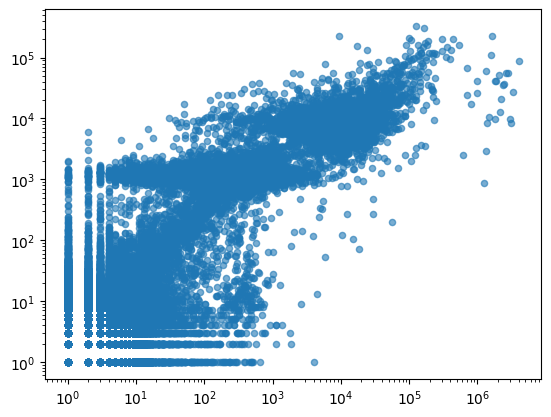

In [ ]:
# basic plot quick check
x_data = df['atac_raw_reads'] + 1
y_data = df['gex_raw_reads'] + 1
plt.scatter(df['atac_raw_reads'], df['gex_raw_reads'], alpha=0.6, s=20)
plt.xscale('log')
plt.yscale('log')

In [ ]:
short_rna = sc.read_h5ad('/multiome_adata_Q3_short_09072025.h5ad')
short_atac = sc.read_h5ad('preprocessing/shortread_atac/outs/20250711_atac_ball_processed.h5ad')

In [8]:
short_rna

AnnData object with n_obs × n_vars = 2479 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine', 'final_annotations'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_int

In [9]:
short_rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,final_annotations
AAACAGCCAGCATGGA-1,Q3,4385,2329,7.753624,4450.0,8.400884,15.146067,8.629213,1.932584,0.0,...,2,1,0,2,43,B-cell lineage,0.983375,Pro-B cells,0.882067,Tumour (Q3)
AAACAGCCATGCTATG-1,Q3,417,979,6.887553,1302.0,7.172425,14.362519,8.832565,2.995392,0.0,...,8,6,45,109,88,B-cell lineage,0.311070,Pro-B cells,0.062003,Tumour (Q3)
AAACATGCATGAATCT-1,Q3,5476,1928,7.564757,3443.0,8.144389,18.123729,12.460064,3.194888,0.0,...,8,20,51,46,234,B cells,0.233567,Pro-B cells,0.035874,Tumour (Q3)
AAACCAACAGCATTAT-1,Q3,12893,2235,7.712444,4611.0,8.436417,22.554760,16.916071,3.600087,0.0,...,1,14,20,117,76,B-cell lineage,0.933031,Pro-B cells,0.999537,Tumour (Q3)
AAACCGAAGCACAGAA-1,Q3,4237,1277,7.153052,2124.0,7.661527,17.184557,10.122410,2.824859,0.0,...,4,22,64,77,217,B-cell lineage,0.054315,Pro-B cells,0.003416,Tumour (Q3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-1,Q3,7190,1494,7.309881,2410.0,7.787797,18.298755,12.697096,2.489627,0.0,...,9,5,3,8,241,B-cell lineage,0.103472,Pro-B cells,0.638477,Tumour (Q3)
TTTGTGAAGCGAGTAA-1,Q3,16787,1178,7.072422,1824.0,7.509336,18.750000,13.760964,3.728070,0.0,...,8,6,25,47,150,B-cell lineage,0.224812,Pro-B cells,0.096180,Tumour (Q3)
TTTGTGAAGCTTTGGG-1,Q3,35783,2229,7.709757,4256.0,8.356320,15.625000,8.764098,1.785714,0.0,...,13,4,58,102,216,B-cell lineage,0.076792,Pro-B cells,0.726579,Tumour (Q3)
TTTGTGGCAGCCTGCA-1,Q3,1763,1218,7.105786,2328.0,7.753194,26.159794,19.630585,2.706186,0.0,...,12,19,40,142,242,B cells,0.821791,Pro-B cells,0.045458,Tumour (Q3)


In [10]:
short_atac

AnnData object with n_obs × n_vars = 2108 × 179331
    obs: 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'sample_id', 'barcode_rank', 'total_fragments_count', 'log10_total_fragments_count', 'unique_fragments_count', 'log10_unique_fragments_count', 'total_fragments_in_peaks_count', 'log10_total_fragments_in_peaks_count', 'unique_fragments_in_peaks_count', 'log10_unique_fragments_in_peaks_count', 'fraction_of_fragments_in_peaks', 'duplication_count', 'duplication_ratio', 'tss_enrichment', 'pdf_values_for_tss_enrichment', 'pdf_values_for_fraction_of_fragments_in_peaks', 'pdf_values_for_duplication_ratio', 'doublets_atac', 'doublet_outlier', 'cell_type', 'sample', 'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3', 'pycisTopic_leiden_10_6', 'is_nan', 'cell_type_all'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopi

In [11]:
short_atac.obs.index = short_atac.obs.index.str.replace('-1-.*','-1',regex = True)
short_atac.obs

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,cell_type,sample,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,is_nan,cell_type_all
ACGCAAGCAGGAATCG-1,20049.0,4.302093,14510.0,4.161667,Q3,190,55419,4.743667,30767,4.488099,...,Tem_Trm_cytotoxic_T_cells,Q3,4,3,5,13,11,15,False,Tem_Trm_cytotoxic_T_cells
AACTACTCAAGTCGCT-1,6785.0,3.831550,5660.0,3.752816,Q3,692,18389,4.264582,10676,4.028449,...,Tcm_Naive_helper_T_cells,Q3,3,4,6,9,1,39,False,Tcm_Naive_helper_T_cells
AGCCAGTGTCATAACG-1,9067.0,3.957464,7922.0,3.898835,Q3,403,29614,4.471512,16228,4.210292,...,Classical_monocytes,Q3,5,5,9,14,8,55,False,Classical_monocytes
AGACAATAGTAACCAC-1,2602.0,3.415307,2403.0,3.380754,Q3,1455,7644,3.883377,4261,3.629613,...,Pro-B_cells_Q3,Q3,3,3,10,17,28,20,False,Pro-B_cells_Q3
CGATGTCCACGTAATT-1,13796.0,4.139753,11665.0,4.066885,Q3,215,48331,4.684235,27219,4.434888,...,Pro-B_cells_Q3,Q3,0,0,3,3,4,4,False,Pro-B_cells_Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TATAGCTCATTGCGAC-1,1931.0,3.285782,1811.0,3.257918,Q3,1936,4791,3.680517,2560,3.408410,...,Pro-B_cells_Q3,Q3,0,0,2,6,10,5,False,Pro-B_cells_Q3
AAACGCGCAACAACAA-1,1081.0,3.033826,1001.0,3.000434,Q3,2324,2622,3.418798,1519,3.181844,...,Classical_monocytes,Q3,5,5,9,14,8,50,False,Classical_monocytes
CGAGGAAGTGTGAGAG-1,1476.0,3.169086,1377.0,3.138934,Q3,2156,3512,3.545678,1936,3.287130,...,Tem_Trm_cytotoxic_T_cells,Q3,2,2,1,10,26,32,False,Tem_Trm_cytotoxic_T_cells
AGCCGGTTCGTTACTT-1,1291.0,3.110926,1259.0,3.100026,Q3,2085,3874,3.588272,2121,3.326745,...,Pro-B_cells_Q3,Q3,0,0,2,1,15,33,False,Pro-B_cells_Q3


In [12]:
merged_df = pd.merge(short_rna.obs, short_atac.obs, left_index=True, right_index=True, how='outer', 
                     indicator = True)
custom_mapping = {
    'left_only': 'RNA_only',
    'right_only': 'ATAC_only',
    'both': 'Multiome'
}
merged_df['_merge'] = merged_df['_merge'].map(custom_mapping)

In [13]:
merged_df

,sample_x,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,sample_y,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,is_nan,cell_type_all,_merge
AAACAGCCAGCATGGA-1,Q3,4385.0,2329.0,7.753624,4450.0,8.400884,15.146067,8.629213,1.932584,0.0,...,Q3,0,0,0,11,5,8,False,Pro-B_cells_Q3,Multiome
AAACAGCCATGCTATG-1,Q3,417.0,979.0,6.887553,1302.0,7.172425,14.362519,8.832565,2.995392,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only
AAACATGCATGAATCT-1,Q3,5476.0,1928.0,7.564757,3443.0,8.144389,18.123729,12.460064,3.194888,0.0,...,Q3,0,0,0,11,5,8,False,Pro-B_cells_Q3,Multiome
AAACCAACAGCATTAT-1,Q3,12893.0,2235.0,7.712444,4611.0,8.436417,22.554760,16.916071,3.600087,0.0,...,Q3,0,0,3,3,31,25,False,Pro-B_cells_Q3,Multiome
AAACCGAAGCACAGAA-1,Q3,4237.0,1277.0,7.153052,2124.0,7.661527,17.184557,10.122410,2.824859,0.0,...,Q3,0,0,7,4,9,29,False,Pro-B_cells_Q3,Multiome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-1,Q3,7190.0,1494.0,7.309881,2410.0,7.787797,18.298755,12.697096,2.489627,0.0,...,Q3,4,3,5,13,11,11,False,Pro-B_cells_Q3,Multiome
TTTGTGAAGCGAGTAA-1,Q3,16787.0,1178.0,7.072422,1824.0,7.509336,18.750000,13.760964,3.728070,0.0,...,Q3,3,3,10,17,28,20,False,Pro-B_cells_Q3,Multiome
TTTGTGAAGCTTTGGG-1,Q3,35783.0,2229.0,7.709757,4256.0,8.356320,15.625000,8.764098,1.785714,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only
TTTGTGGCAGCCTGCA-1,Q3,1763.0,1218.0,7.105786,2328.0,7.753194,26.159794,19.630585,2.706186,0.0,...,Q3,0,0,0,11,19,8,False,Pro-B_cells_Q3,Multiome


In [14]:
merged_df['_merge'].value_counts()

Multiome     1947
RNA_only      532
ATAC_only     161
Name: _merge, dtype: int64

In [ ]:
def plot_dna_rna_scatter(input_file, output_file, multiome_info):
    """
    Create a scatter plot comparing DNA and RNA counts with color coding based on '_merge' column
    
    Parameters:
    -----------
    input_file : str
        Path to 10X cellranger arc count file
    output_file : str
        Path for output plot file
    dna_barcodes : pd.DataFrame
        DataFrame with DNA barcodes in column 'V1'
    rna_barcodes : pd.DataFrame
        DataFrame with RNA barcodes in column 'V1'
    matched_barcodes : pd.DataFrame
        DataFrame with columns 'atac_barcode' and 'cDNA_barcode'
    multiome_info : pd.DataFrame
        DataFrame with 'CB' and '_merge' columns for color mapping
    """
    from matplotlib.colors import LogNorm
    import numpy as np
    

    df = pd.read_csv(input_file)


    # Merge with multiome_info to get '_merge' column for coloring
    df = pd.merge(df, multiome_info[['_merge']], left_on='barcode', right_index = True, how='left')
    
    plt.figure(figsize=(10, 7))

    # Separate data based on multiome_or_not values
    nan_mask = df['_merge'].isna()
    non_nan_data = df[~nan_mask]
    nan_data = df[nan_mask]
    
    # Plot NaN values (grey)
    if len(nan_data) > 0:

        
        x_nan = nan_data['atac_raw_reads'] + 1
        y_nan = nan_data['gex_raw_reads'] + 1
        plt.scatter(x_nan, y_nan, 
                   c='grey', alpha=0.5, s=1, label='Non-cell', rasterized=True)

    # Plot non-NaN values with colors based on '_merge'
    if len(non_nan_data) > 0:
        color_map = {
            'Multiome': '#0072B2',
            'RNA_only': '#E69F00',
            'ATAC_only': '#009E73'
        }
        
        unique_multiome = non_nan_data['_merge'].unique()

        
        # Plot categories eparate
        for merged_val in unique_multiome:
            subset = non_nan_data[non_nan_data['_merge'] == merged_val]
            x_subset = subset['atac_raw_reads'] + 1
            y_subset = subset['gex_raw_reads'] + 1
            color = color_map.get(merged_val, 'black')
            plt.scatter(x_subset, y_subset, 
                       c=color, alpha=0.5, s=1, 
                       label=f'{merged_val}', rasterized=True)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 10000000)
    plt.ylim(1, 10000000)
    

    # axis label
    def format_func(x, p):
        return f"{x:,.0f}"
    formatter = FuncFormatter(format_func)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.xlabel('DNA counts', fontsize=12)
    plt.ylabel('RNA counts', fontsize=12)
    
    plt.xticks(rotation=45)
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=5)
    
    plt.grid(True, alpha=0.3)
    plt.gca().set_facecolor('white')
    
    plt.tight_layout()
    
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

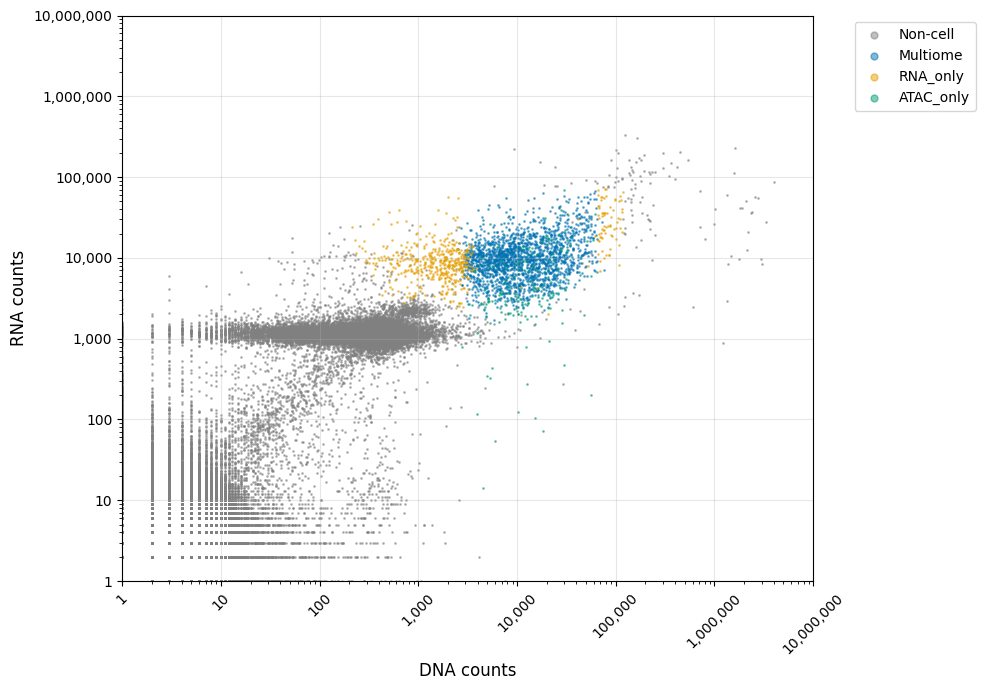

In [ ]:
input = '/cellranger_arc/20250617_cellranger_ref/Q3/outs/per_barcode_metrics.csv'
plot_dna_rna_scatter(input, 'figures/kneeplot_short_read_Q3.pdf',merged_df)

# Kneeplot - Long read multiome - all time points

In [ ]:
# get atac and rna objects - change paths accordingly
rna = sc.read_h5ad("/multiome_adata_04072025.h5ad")
atac = sc.read_h5ad("/preprocessing/atac/outs/20250710_atac_ball_processed.h5ad"). # you may need to change the name of object with correct date

In [8]:
rna

AnnData object with n_obs × n_vars = 10106 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'celltypist_

In [9]:
atac.obs.total_fragments_count.min()

1538

In [10]:
atac

AnnData object with n_obs × n_vars = 10268 × 190760
    obs: 'barcode_rank', 'fraction_of_fragments_in_peaks', 'cisTopic_nr_acc', 'log10_unique_fragments_count', 'duplication_count', 'tss_enrichment', 'cisTopic_log_nr_acc', 'pdf_values_for_duplication_ratio', 'cisTopic_nr_frag', 'pdf_values_for_tss_enrichment', 'log10_total_fragments_in_peaks_count', 'pdf_values_for_fraction_of_fragments_in_peaks', 'log10_total_fragments_count', 'total_fragments_count', 'doublets_atac', 'unique_fragments_count', 'cisTopic_log_nr_frag', 'unique_fragments_in_peaks_count', 'barcode', 'duplication_ratio', 'log10_unique_fragments_in_peaks_count', 'doublet_outlier', 'total_fragments_in_peaks_count', 'cell_type', 'sample_id', 'pycisTopic_leiden_10_0.2', 'pycisTopic_leiden_10_0.3', 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3', 'pycisTopic_leiden_10_6', 'is_nan', 'cell_type_all'
    var: 'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTo

In [11]:
rna.obs['CB_rna'] = rna.obs.index.str.replace('-.*','', regex = True)
rna.obs['CB_rna']

AAACAGCCAGTTTGTG-D0    AAACAGCCAGTTTGTG
AAACAGCCATGTTTGG-D0    AAACAGCCATGTTTGG
AAACAGCCATTTAAGC-D0    AAACAGCCATTTAAGC
AAACATGCATTGGGAG-D0    AAACATGCATTGGGAG
AAACCAACAATAACCT-D0    AAACCAACAATAACCT
                             ...       
TTTGTGAAGCATGAAG-Q3    TTTGTGAAGCATGAAG
TTTGTGAAGCGAGTAA-Q3    TTTGTGAAGCGAGTAA
TTTGTGGCAGCCTGCA-Q3    TTTGTGGCAGCCTGCA
TTTGTTGGTAAACAAG-Q3    TTTGTTGGTAAACAAG
TTTGTTGGTTAAGCTG-Q3    TTTGTTGGTTAAGCTG
Name: CB_rna, Length: 10106, dtype: object

In [12]:
atac.obs['CB'] = atac.obs.index
atac.obs['sample'] = atac.obs['sample_id']

In [13]:
atac.obs['cell_type'].isna().sum()

2746

In [ ]:
dna_barcodes = pd.read_csv("/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz", compression='gzip', header=None)
rna_barcodes = pd.read_csv("/barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz", compression='gzip', header=None)
matched_barcodes = pd.concat([dna_barcodes, rna_barcodes], axis=1)
matched_barcodes.columns = ["atac_barcode", "cDNA_barcode"]
barcode_map = dict(zip(matched_barcodes['cDNA_barcode'], matched_barcodes['atac_barcode']))
rna.obs['CB'] = rna.obs['CB_rna'].map(barcode_map)
rna.obs['CB'] = rna.obs['CB'].astype(str)  + '-' + rna.obs['sample'].astype(str) + '___'+rna.obs['sample'].astype(str) 


In [16]:
rna.obs['CB']

AAACAGCCAGTTTGTG-D0    ACAGCGGGTGTTACTA-D0___D0
AAACAGCCATGTTTGG-D0    ACAGCGGGTTTATCCT-D0___D0
AAACAGCCATTTAAGC-D0    ACAGCGGGTTCACTTT-D0___D0
AAACATGCATTGGGAG-D0    CATTTAGGTGTCCACA-D0___D0
AAACCAACAATAACCT-D0    CTTTATCGTCGAGGCA-D0___D0
                                 ...           
TTTGTGAAGCATGAAG-Q3    GTAGGTGTCAGTGAAC-Q3___Q3
TTTGTGAAGCGAGTAA-Q3    GTAGGTGTCGGTCCAT-Q3___Q3
TTTGTGGCAGCCTGCA-Q3    GTTTGGTGTTTCTAAG-Q3___Q3
TTTGTTGGTAAACAAG-Q3    CGTACTTCAAATATGC-Q3___Q3
TTTGTTGGTTAAGCTG-Q3    CGTACTTCATGATGAT-Q3___Q3
Name: CB, Length: 10106, dtype: object

In [126]:
merged_df = pd.merge(rna.obs, atac.obs, on='CB', how='outer', 
                     indicator = True)
custom_mapping = {
    'left_only': 'RNA_only',
    'right_only': 'ATAC_only',
    'both': 'Multiome'
}
merged_df['_merge'] = merged_df['_merge'].map(custom_mapping)

In [127]:
merged_df

,sample_x,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,pycisTopic_leiden_10_0.2,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,is_nan,cell_type_all,sample_y,_merge
0,D0,8056.0,1891.0,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,...,1,1,1,5,0,21,False,Pro-B_cells_D0,D0,Multiome
1,D0,23901.0,2319.0,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,...,1,1,1,6,6,0,False,Pro-B_cells_D0,D0,Multiome
2,D0,31317.0,1667.0,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,...,1,1,1,6,6,0,False,Pro-B_cells_D0,D0,Multiome
3,D0,1039.0,1599.0,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only
4,D0,25718.0,1403.0,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,...,1,1,1,6,6,0,False,Pro-B_cells_D0,D0,Multiome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,3,1,13,2,True,Pro-B_cells_Q3,Q3,ATAC_only
12808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,3,1,13,2,True,Pro-B_cells_Q3,Q3,ATAC_only
12809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,7,8,14,20,39,True,Pro-B_cells_Q3,Q3,ATAC_only
12810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,3,1,12,41,True,Pro-B_cells_Q3,Q3,ATAC_only


In [134]:
merged_df['cell_type'].value_counts().sum()

7522

In [82]:
merged_df['sample_complete'] = merged_df['sample_x'].combine_first(merged_df['sample_y'])

In [83]:
merged_df[merged_df['sample_x'] != merged_df['sample_y']]

/opt/venv/lib/python3.11/site-packages/IPython/lib/pretty.py:779: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/opt/venv/lib/python3.11/site-packages/IPython/core/formatters.py:347: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,sample_x,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,pycisTopic_leiden_10_0.3,pycisTopic_leiden_10_0.6,pycisTopic_leiden_10_1.2,pycisTopic_leiden_10_3,pycisTopic_leiden_10_6,is_nan,cell_type_all,sample_y,_merge,sample_complete
3,D0,1039.0,1599.0,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only,D0
7,D0,0.0,1814.0,7.503841,8676.5,9.068489,28.237192,17.576212,11.433182,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only,D0
26,D0,2128.0,2133.0,7.665753,9676.0,9.177507,25.671765,17.083506,8.174866,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only,D0
34,D0,58271.0,2651.0,7.883069,13084.0,9.479222,18.197799,7.383063,11.449098,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only,D0
45,D0,24023.0,1655.0,7.412160,6319.5,8.751554,19.906638,10.412216,8.956405,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNA_only,D0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,13,2,True,Pro-B_cells_Q3,Q3,ATAC_only,Q3
12808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,13,2,True,Pro-B_cells_Q3,Q3,ATAC_only,Q3
12809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,8,14,20,39,True,Pro-B_cells_Q3,Q3,ATAC_only,Q3
12810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,12,41,True,Pro-B_cells_Q3,Q3,ATAC_only,Q3


In [84]:
merged_df[merged_df['sample_x'] != merged_df['sample_y']]['sample_x'].isna().sum()

2706

In [85]:
merged_df[merged_df['sample_x'] != merged_df['sample_y']]['sample_y'].isna().sum()

2544

In [86]:
merged_df['sample_complete'].value_counts()

Q1    5914
Q3    2528
D0    2242
Q2    2128
Name: sample_complete, dtype: int64

In [87]:
merged_df['sample_complete'].isna().sum()

0

In [128]:
merged_df[['_merge']].value_counts().sum()

12812

In [129]:
merged_df[['_merge']].value_counts()

_merge   
Multiome     7562
ATAC_only    2706
RNA_only     2544
dtype: int64

In [110]:
merged_df.columns

Index(['sample_complete', 'CB', '_merge'], dtype='object')

In [89]:
merged_df['CB'] = merged_df['CB'].str.replace('-.*','',regex = True)
merged_df['CB']

0        ACAGCGGGTGTTACTA
1        ACAGCGGGTTTATCCT
2        ACAGCGGGTTCACTTT
3        CATTTAGGTGTCCACA
4        CTTTATCGTCGAGGCA
               ...       
12807    GTGGACCAGGGTGGGA
12808    GTACCGGCATTTCATG
12809    GAAGGCCTCAACCGGA
12810    GGCTTTGGTAGAGGGA
12811    CGTAAAGGTTCACCTC
Name: CB, Length: 12812, dtype: object

In [90]:
merged_df = merged_df[['sample_complete','CB','_merge']]

In [91]:
dict_samples = dict(tuple(merged_df.groupby('sample_complete')))

In [ ]:
def plot_dna_rna_scatter(dna_file, rna_file, output_file, dna_barcodes, rna_barcodes, matched_barcodes, multiome_info):
    """
    Create a scatter plot comparing DNA and RNA counts with color coding based on '_merge' column
    
    Parameters:
    -----------
    dna_file : str
        Path to DNA count file
    rna_file : str  
        Path to RNA count file
    output_file : str
        Path for output plot file
    dna_barcodes : pd.DataFrame
        DataFrame with DNA barcodes 
    rna_barcodes : pd.DataFrame
        DataFrame with RNA barcodes 
    matched_barcodes : pd.DataFrame
        DataFrame with columns 'atac_barcode' and 'cDNA_barcode'
    multiome_info : pd.DataFrame
        DataFrame with 'CB' and '_merge' columns for color mapping
    """
    from matplotlib.colors import LogNorm
    import numpy as np
    

    dna = pd.read_csv(dna_file, sep='\t', header=None, names=['CB', 'count_dna'])
    rna = pd.read_csv(rna_file, header=None, names=['CB_rna', 'count_rna'])

    dna = dna[dna['CB'].isin(dna_barcodes[0])]
    rna = rna[rna['CB_rna'].isin(rna_barcodes[0])]
    barcode_map = dict(zip(matched_barcodes['cDNA_barcode'], matched_barcodes['atac_barcode']))
    rna['CB'] = rna['CB_rna'].map(barcode_map)
    dna_rna = pd.merge(dna, rna[['CB', 'count_rna']], on='CB', how='outer')
    
    # Fill NA values with 0
    dna_rna['count_dna'] = dna_rna['count_dna'].fillna(0)
    dna_rna['count_rna'] = dna_rna['count_rna'].fillna(0)

    # Merge with multiome_info to get '_merge' column for coloring
    dna_rna = pd.merge(dna_rna, multiome_info[['CB', '_merge']], on='CB', how='left')
    
    plt.figure(figsize=(10, 7))

    # Separate data based on multiome_or_not values
    nan_mask = dna_rna['_merge'].isna()
    non_nan_data = dna_rna[~nan_mask]
    nan_data = dna_rna[nan_mask]
    
    # Plot NaN values (grey)
    if len(nan_data) > 0:

        
        x_nan = nan_data['count_dna'] + 1
        y_nan = nan_data['count_rna'] + 1
        plt.scatter(x_nan, y_nan, 
                   c='grey', alpha=0.5, s=1, label='Non-cell', rasterized=True)

    # Plot non-NaN values with colors based on '_merge'
    if len(non_nan_data) > 0:
        color_map = {
            'Multiome': '#0072B2',
            'RNA_only': '#E69F00',
            'ATAC_only': '#009E73'
        }
        
        unique_multiome = non_nan_data['_merge'].unique()

        
        # Plot categories eparate
        for merged_val in unique_multiome:
            subset = non_nan_data[non_nan_data['_merge'] == merged_val]
            x_subset = subset['count_dna'] + 1
            y_subset = subset['count_rna'] + 1
            color = color_map.get(merged_val, 'black')
            plt.scatter(x_subset, y_subset, 
                       c=color, alpha=0.5, s=1, 
                       label=f'{merged_val}', rasterized=True)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, 10000000)
    plt.ylim(1, 10000000)
    

    # axis label
    def format_func(x, p):
        return f"{x:,.0f}"
    formatter = FuncFormatter(format_func)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.xlabel('DNA counts', fontsize=12)
    plt.ylabel('RNA counts', fontsize=12)
    
    plt.xticks(rotation=45)
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=5)
    
    plt.grid(True, alpha=0.3)
    plt.gca().set_facecolor('white')
    
    plt.tight_layout()
    
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

D0


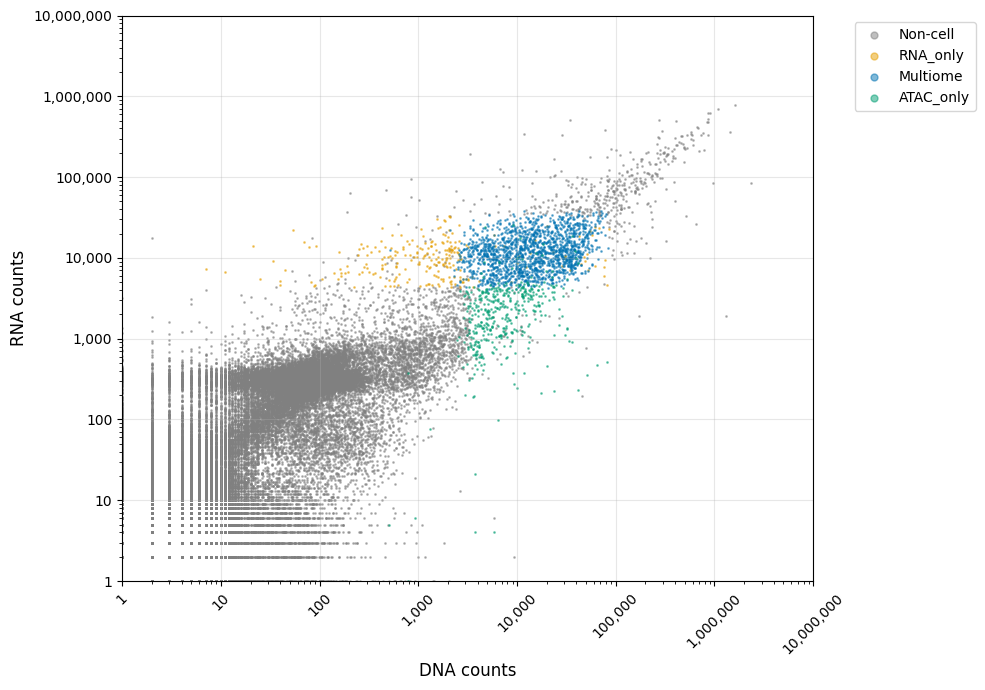

Q1


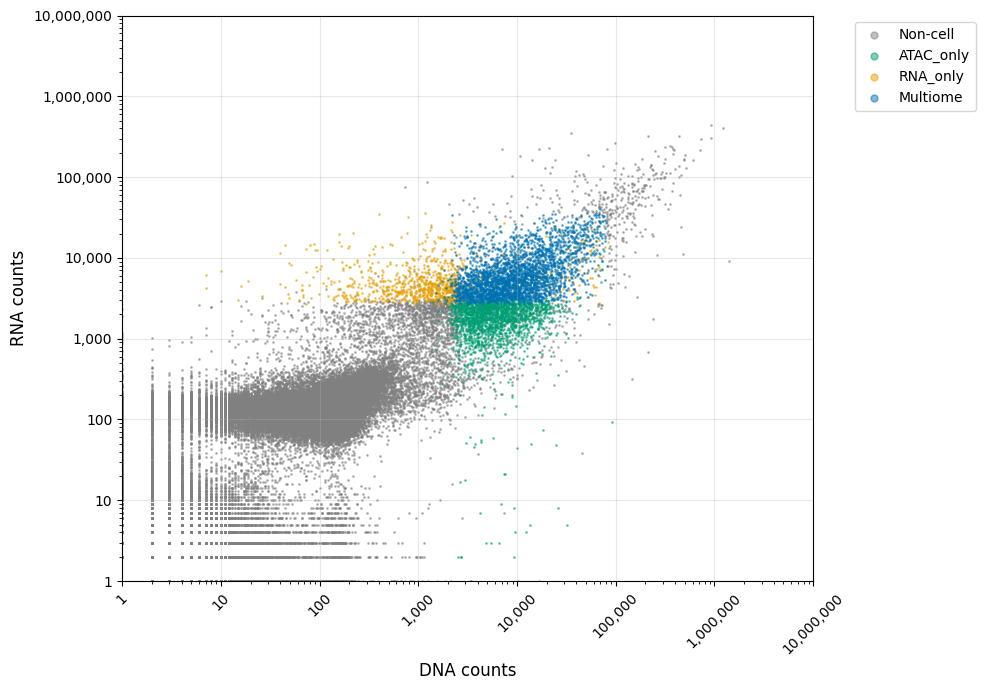

Q2


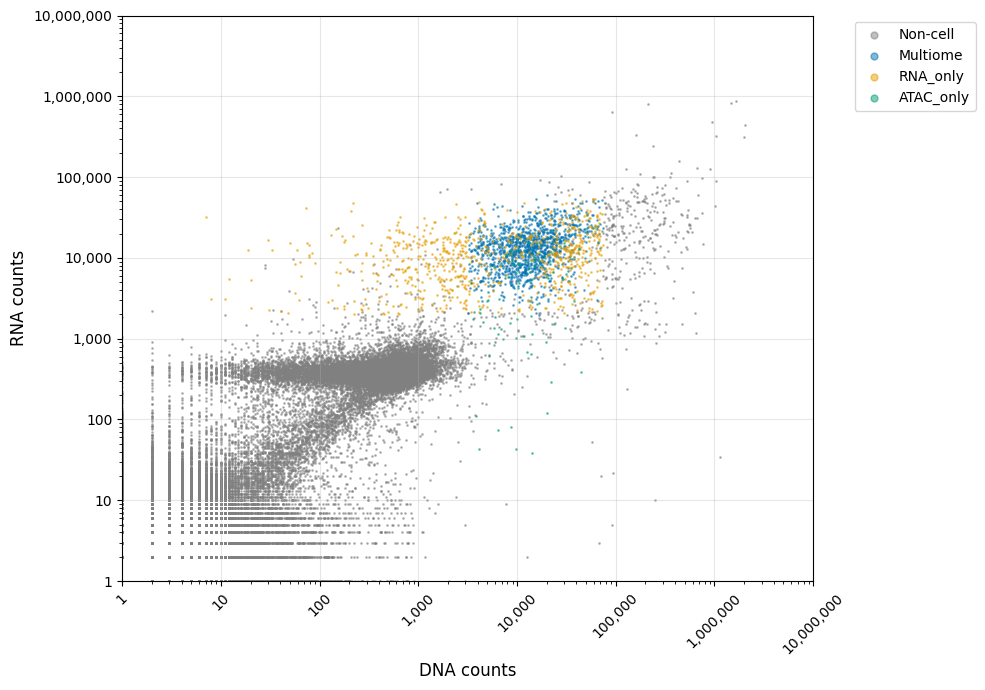

Q3


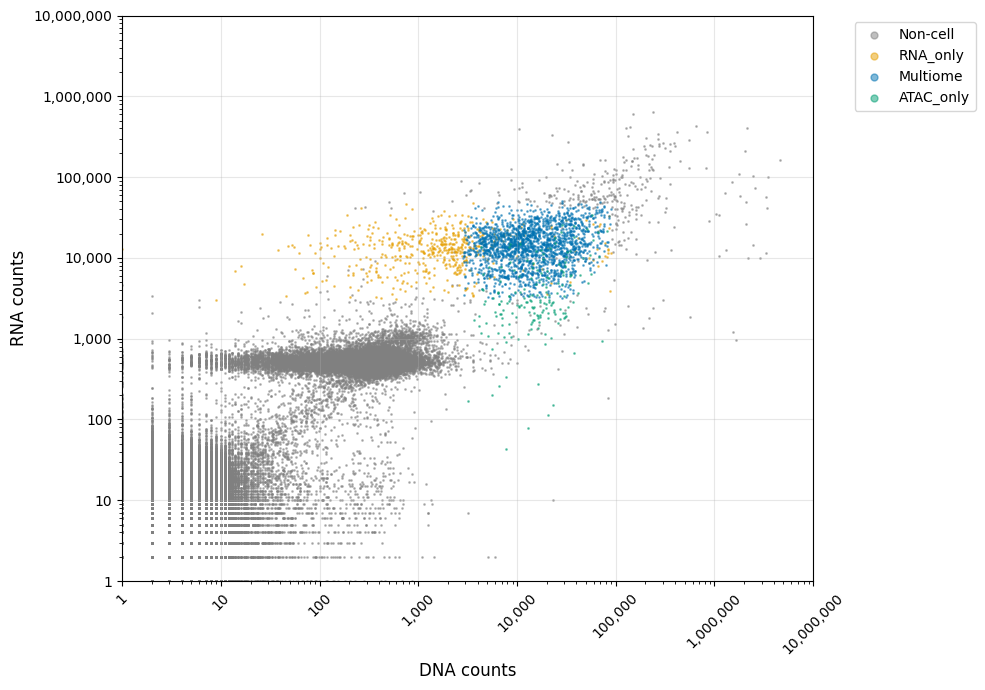

In [ ]:

for sample_name, dict_sample in dict_samples.items():
    print(sample_name)
    
    plot_dna_rna_scatter(f'/scdnalong/results_duplicates_fixed/{sample_name}/flexiplex/flexiplex_barcodes_counts.txt',
                     f'/scnanoseq/results/{sample_name}/blaze/{sample_name}.bc_count.txt', f'figures/scatterplot_rasterised_{sample_name}.pdf',
                    dna_barcodes, rna_barcodes, matched_barcodes, dict_sample)

# Q3 ATAC cellranger vs flexiplex (short vs long atac)

In [ ]:
long = pd.read_csv('/scdnalong/results_duplicates_fixed/Q3/flexiplex/flexiplex_barcodes_counts.txt', sep = '\t',header = None)
long = long.rename(columns={0:"barcode",1: "DNA UMIs"})
#long = long.set_index(0)
long[:5]

,barcode,DNA UMIs
0,GATTACGCATTGTCCG,4592848
1,TGATGAGGTGGTTAGA,3503901
2,TTGGTTAGTCCGTTAG,3424681
3,CCTTCCTCACAATAAC,3327779
4,GCTAACCTCCACGTTA,3296614


In [ ]:
short = pd.read_csv('/cellranger_arc/20250617_cellranger_ref/Q3/outs/per_barcode_metrics.csv')
short['atac_barcode'] = short['atac_barcode'].str.replace('-1','', regex = True)
short['gex_barcode'] = short['gex_barcode'].str.replace('-1','', regex = True)
short[:5]

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,...,atac_raw_reads,atac_unmapped_reads,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites
0,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC,0,2,6,3,0,3,0,...,1,0,0,0,0,0,1,0,0,0
1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA,ACAGCGGGTCATGGTT,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC,ACAGCGGGTAGGTGAC,0,0,4,3,1,0,2,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
import pycisTopic
import pickle
short_atac = sc.read_h5ad('/shortread_atac/outs/20250711_atac_ball_processed.h5ad')
short_atac = short_atac.obs
short_atac['cDNA_barcode'] = short_atac.index.str.replace('-1.*','',regex = True)
short_atac


file_path = '/preprocessing/atac/Q3_subset/outs/cistopic_obj_all_info.pkl'
with open(file_path, 'rb') as file:
    cistopic_obj = pickle.load(file)
long_atac = cistopic_obj.cell_data

# convert barcodes in long atac to cDNA one
dna_barcodes = pd.read_csv("/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz", compression='gzip', header=None)
rna_barcodes = pd.read_csv("/barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz", compression='gzip', header=None)
matched_barcodes = pd.concat([dna_barcodes, rna_barcodes], axis=1)
matched_barcodes.columns = ["atac_barcode", "cDNA_barcode"]

barcode_map = dict(zip(matched_barcodes['atac_barcode'],matched_barcodes['cDNA_barcode']))
long_atac['cDNA_barcode'] = long_atac['barcode'].map(barcode_map)

# merge long and short atac objects

processed_atac = pd.merge(short_atac,long_atac, on = 'cDNA_barcode', how = 'outer', indicator = True)
custom_mapping = {
    'left_only': 'Short_only',
    'right_only': 'SPLONGGET_only',
    'both': 'Both'
}
processed_atac['_merge'] = processed_atac['_merge'].map(custom_mapping)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-15 10:03:48,332	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
atac = pd.merge(short,long, right_on = 'barcode',left_on = 'atac_barcode', how = 'outer')

In [ ]:
atac = pd.merge(atac,processed_atac, right_on = 'cDNA_barcode',left_on = 'gex_barcode', how = 'outer')

In [ ]:
processed_atac._merge.value_counts()

Both              1893
Short_only         215
SPLONGGET_only      79
Name: _merge, dtype: int64

In [ ]:
atac._merge.value_counts()

Both              1893
Short_only         215
SPLONGGET_only      79
Name: _merge, dtype: int64

In [ ]:
atac

,barcode_x,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,...,sample_id_y,pycisTopic_leiden_10_0.2_y,pycisTopic_leiden_10_0.3_y,pycisTopic_leiden_10_0.6_y,pycisTopic_leiden_10_1.2_y,pycisTopic_leiden_10_3_y,pycisTopic_leiden_10_6_y,cell_type_all_y,is_nan_y,_merge
0,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC,0.0,2.0,6.0,3.0,0.0,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA,ACAGCGGGTCATGGTT,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC,ACAGCGGGTAGGTGAC,0.0,0.0,4.0,3.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4800621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4800622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4800623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def plot_dna_rna_scatter(output_file, df):
    """
    Create a scatter plot comparing DNA and RNA counts with color coding based on '_merge' column

    -----------
   
    """
    from matplotlib.colors import LogNorm
    import numpy as np
    
    plt.figure(figsize=(10, 7))

    
    # Separate data based on multiome_or_not values
    nan_mask = df['_merge'].isna()

    df['DNA UMIs'] = df['DNA UMIs'].fillna(0)
    df['atac_raw_reads'] = df['atac_raw_reads'].fillna(0)

   # nan_mask = df['_merge'].isna()
    non_nan_data = df[~nan_mask]
    nan_data = df[nan_mask]



    # Plot NaN values (grey)
    if len(nan_data) > 0:

        x_nan = nan_data['atac_raw_reads'] + 1
        y_nan = nan_data['DNA UMIs'] + 1

        plt.scatter(x_nan, y_nan, 
                   c='grey', alpha=0.5, s=1, label='Non-cell', rasterized=True)

    # Plot non-NaN values with colors based on '_merge'
    if len(non_nan_data) > 0:
        color_map = {
            'SPLONGGET_only': '#0072B2',
            'Short_only': '#E69F00',
            'Both': '#009E73'
        }
        
        unique_multiome = non_nan_data['_merge'].unique()

        
        # Plot categories eparate
        for merged_val in unique_multiome:
            subset = non_nan_data[non_nan_data['_merge'] == merged_val]
            x_subset = subset['atac_raw_reads'] + 1
            y_subset = subset['DNA UMIs'] + 1
            color = color_map.get(merged_val, 'black')
            plt.scatter(x_subset, y_subset, 
                       c=color, alpha=0.5, s=1, 
                       label=f'{merged_val}', rasterized=True)
    
  


    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0, 10000000)
    plt.ylim(0, 10000000)
    

    # axis label
    def format_func(x, p):
        return f"{x:,.0f}"
    formatter = FuncFormatter(format_func)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.xlabel('DNA counts (short)', fontsize=12)
    plt.ylabel('DNA counts (long)', fontsize=12)
    
    plt.xticks(rotation=45)
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=5)
    
    plt.grid(True, alpha=0.3)
    plt.gca().set_facecolor('white')
    
    plt.tight_layout()
    
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

/tmp/ipykernel_4171205/4265692684.py:112: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000000)
/tmp/ipykernel_4171205/4265692684.py:113: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000000)


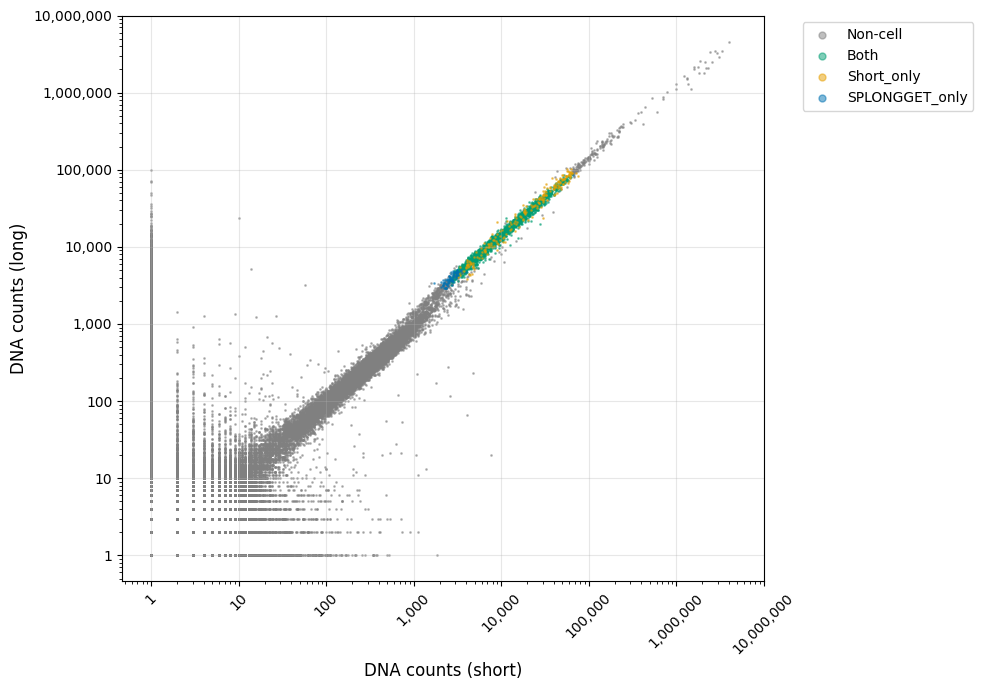

In [ ]:
plot_dna_rna_scatter("figures/DNA_splongget_illumina_counts_scatter.pdf",atac)

In [ ]:
atac['DNA UMIs'].max()

4592848.0

# Q3 RNA cellranger vs blaze (short vs long)

In [ ]:
short = pd.read_csv('/cellranger_arc/20250617_cellranger_ref/Q3/outs/per_barcode_metrics.csv')
short['atac_barcode'] = short['atac_barcode'].str.replace('-1','', regex = True)
short['gex_barcode'] = short['gex_barcode'].str.replace('-1','', regex = True)
short[:5]

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,...,atac_raw_reads,atac_unmapped_reads,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites
0,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC,0,2,6,3,0,3,0,...,1,0,0,0,0,0,1,0,0,0
1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA,ACAGCGGGTCATGGTT,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC,ACAGCGGGTAGGTGAC,0,0,4,3,1,0,2,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
rna_file = '/scnanoseq/results/Q3/blaze/Q3.bc_count.txt'
long = pd.read_csv(rna_file, header=None, names=['CB_rna', 'count_rna'])
long

,CB_rna,count_rna
0,NaN,51886593
1,AAAAAAAAAAAAAAAA,275
2,AAAAAAAAAAAAAAAC,7
3,AAAAAAAAAAAAAAAG,46
4,AAAAAAAAAAAAAAAT,47
...,...,...
9330215,TTTTTTTTTTTTTTGT,75
9330216,TTTTTTTTTTTTTTTA,141
9330217,TTTTTTTTTTTTTTTC,310
9330218,TTTTTTTTTTTTTTTG,180


In [5]:
rna = pd.merge(short, long, left_on= 'gex_barcode',right_on = 'CB_rna', how = 'outer')
rna

,barcode,gex_barcode,atac_barcode,is_cell,excluded_reason,gex_raw_reads,gex_mapped_reads,gex_conf_intergenic_reads,gex_conf_exonic_reads,gex_conf_intronic_reads,...,atac_lowmapq,atac_dup_reads,atac_chimeric_reads,atac_mitochondrial_reads,atac_fragments,atac_TSS_fragments,atac_peak_region_fragments,atac_peak_region_cutsites,CB_rna,count_rna
0,AAACAGCCAAACAACA-1,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC,0.0,2.0,6.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,AAACAGCCAAACAACA,10.0
1,AAACAGCCAAACCCTA-1,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAACAGCCAAACCCTA,7.0
2,AAACAGCCAAACCTTG-1,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAACAGCCAAACCTTG,5.0
3,AAACAGCCAAACGCGA-1,AAACAGCCAAACGCGA,ACAGCGGGTCATGGTT,0.0,0.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAACAGCCAAACGCGA,5.0
4,AAACAGCCAAACGGGC-1,AAACAGCCAAACGGGC,ACAGCGGGTAGGTGAC,0.0,0.0,4.0,3.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAACAGCCAAACGGGC,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9366281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTTTTTTTTTTTTGT,75.0
9366282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTTTTTTTTTTTTTA,141.0
9366283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTTTTTTTTTTTTTC,310.0
9366284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TTTTTTTTTTTTTTTG,180.0


In [ ]:
# colors from the processed RNA objects
short_rna = sc.read_h5ad('/multiome_adata_Q3_short_09072025.h5ad')
short_rna = short_rna.obs
short_rna['barcode'] = short_rna.index.str.replace('-.*','',regex = True)


long_rna = sc.read_h5ad('/multiome_adata_Q3_long_09072025.h5ad')
long_rna = long_rna.obs
long_rna['barcode'] = long_rna.index.str.replace('-.*','',regex = True)


processed_rna = pd.merge(short_rna, long_rna,how = 'outer', on = 'barcode', indicator = True)
custom_mapping = {
    'left_only': 'Short_only',
    'right_only': 'SPLONGGET_only',
    'both': 'Both'
}
processed_rna['_merge'] = processed_rna['_merge'].map(custom_mapping)

In [7]:
rna = pd.merge(rna,processed_rna, how = 'outer', left_on = 'gex_barcode', right_on = 'barcode' )

In [8]:
rna._merge.value_counts()

Both              2185
Short_only         294
SPLONGGET_only     121
Name: _merge, dtype: int64

In [9]:
def plot_rna_rna_scatter(output_file, df):
    """
    Create a scatter plot comparing DNA and RNA counts with color coding based on '_merge' column
    
    Parameters:
    -----------
   
    """
    from matplotlib.colors import LogNorm
    import numpy as np
    
    plt.figure(figsize=(10, 7))

    
    # Separate data based on multiome_or_not values
    nan_mask = df['_merge'].isna()

    df['count_rna'] = df['count_rna'].fillna(0)
    df['gex_raw_reads'] = df['gex_raw_reads'].fillna(0)

    non_nan_data = df[~nan_mask]
    nan_data = df[nan_mask]



    # Plot NaN values (grey)
    if len(nan_data) > 0:

        x_nan = nan_data['gex_raw_reads'] + 1
        y_nan = nan_data['count_rna'] + 1

        plt.scatter(x_nan, y_nan, 
                   c='grey', alpha=0.5, s=1, label='Non-cell', rasterized=True)

    # Plot non-NaN values with colors based on '_merge'
    if len(non_nan_data) > 0:
        color_map = {
            'SPLONGGET_only': '#0072B2',
            'Short_only': '#E69F00',
            'Both': '#009E73'
        }
        
        unique_multiome = non_nan_data['_merge'].unique()

        
        # Plot categories eparate
        for merged_val in unique_multiome:
            subset = non_nan_data[non_nan_data['_merge'] == merged_val]
            x_subset = subset['gex_raw_reads'] + 1
            y_subset = subset['count_rna'] + 1
            color = color_map.get(merged_val, 'black')
            plt.scatter(x_subset, y_subset, 
                       c=color, alpha=0.5, s=1, 
                       label=f'{merged_val}', rasterized=True)
    
  


    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0, 10000000)
    plt.ylim(0, 10000000)
    

    # axis label
    def format_func(x, p):
        return f"{x:,.0f}"
    formatter = FuncFormatter(format_func)
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.gca().yaxis.set_major_formatter(formatter)
    
    plt.xlabel('cDNA counts (short)', fontsize=12)
    plt.ylabel('cDNA counts (long)', fontsize=12)
    
    plt.xticks(rotation=45)
    
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=5)
    
    plt.grid(True, alpha=0.3)
    plt.gca().set_facecolor('white')
    
    plt.tight_layout()
    
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

/tmp/ipykernel_4174305/1740662859.py:62: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10000000)
/tmp/ipykernel_4174305/1740662859.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 10000000)


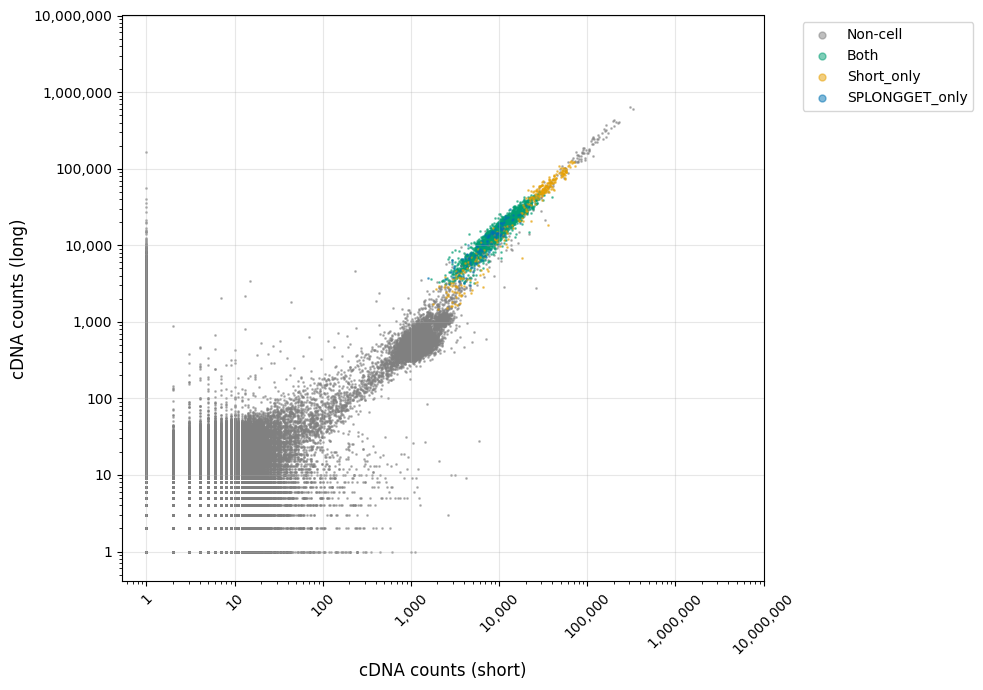

In [10]:
plot_rna_rna_scatter("figures/cDNA_splongget_illumina_counts_scatter.pdf",rna)

In [11]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     